In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from itertools import chain

from IPython.display import Image, display
from utils import *
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, RocCurveDisplay, accuracy_score

sns.set()
%matplotlib inline

color_palette = {
    'CN': '#00e073',
    'MCI': '#e69f90',
    'DEM': '#56b4e9',
}

In [2]:
id_vars = [
    'ID',
    'Diagnosis',
    'Age',
    'Gender',
    'Months_Education',
    'literacy',
    'Months_Education',
]
value_vars = [
    'TADLQ_1_eating',
    'TADLQ_2_dressing',
    'TADLQ_3_bathroom',
    'TADLQ_4_elimination',
    'TADLQ_5_pills',
    'TADLQ_6_personal_appearence',
    'TADLQ_7_meal_preparation',
    'TADLQ_8_setting_table',
    'TADLQ_9_housekeeping',
    'TADLQ_10_home_maintenance',
    'TADLQ_11_home_repairs',
    'TADLQ_12_laundry',
    'TADLQ_13_employment',
    'TADLQ_14_recreation',
    'TADLQ_15_organizations',
    'TADLQ_16_travel',
    'TADLQ_17_Foodshopping',
    'TADLQ_18_cash',
    'TADLQ_19_finances',
    'TADLQ_20_public_transportation',
    'TADLQ_21_driving',
    'TADLQ_22_mobility_neighborhood',
    'TADLQ_23_travel_outside_familiar',
    'TADLQ_24_telephone',
    'TADLQ_25_talking',
    'TADLQ_26_understanding',
    'TADLQ_27_reading',
    'TADLQ_30_cellphone',
    'TADLQ_31_ATM',
]

df_muestratotal = pd.read_spss('data/2024_TADQL_muestratotal_PCARF.sav', usecols=id_vars + value_vars)
df_solohombres = pd.read_spss('data/2024_TADQL_solohombres_PCARF.sav', usecols=id_vars + value_vars)
df_solomujeres = pd.read_spss('data/2024_TADQL_solomujeres_PCARF.sav', usecols=id_vars + value_vars)

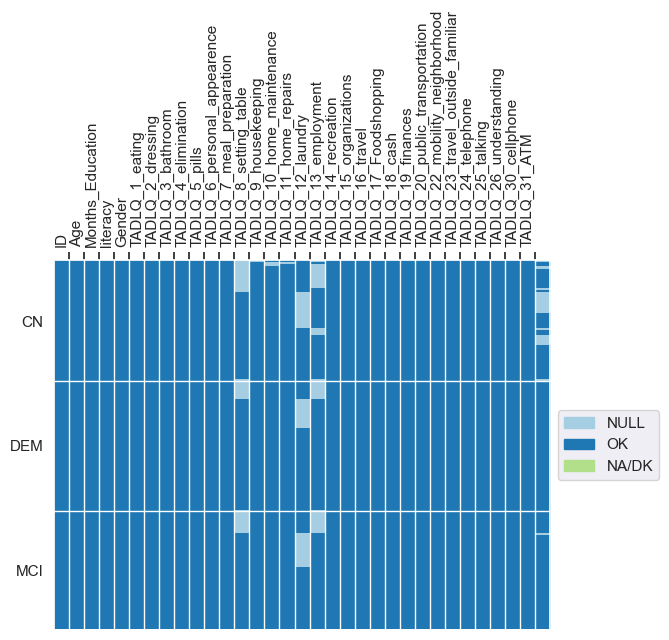

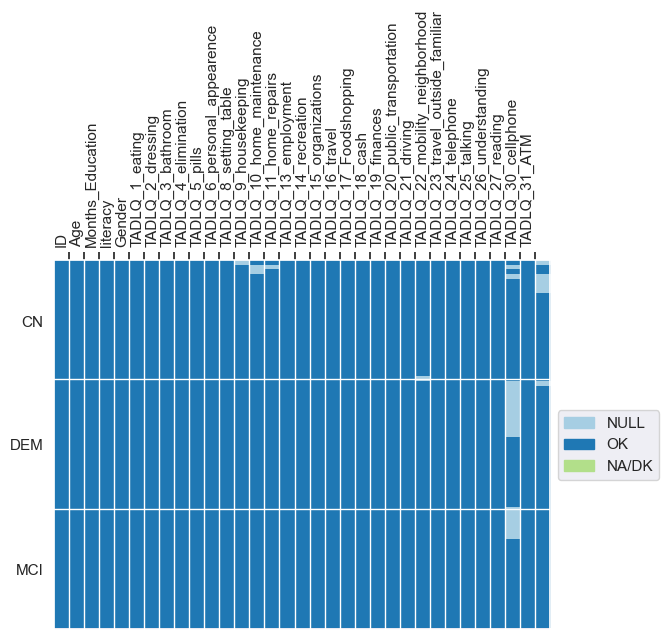

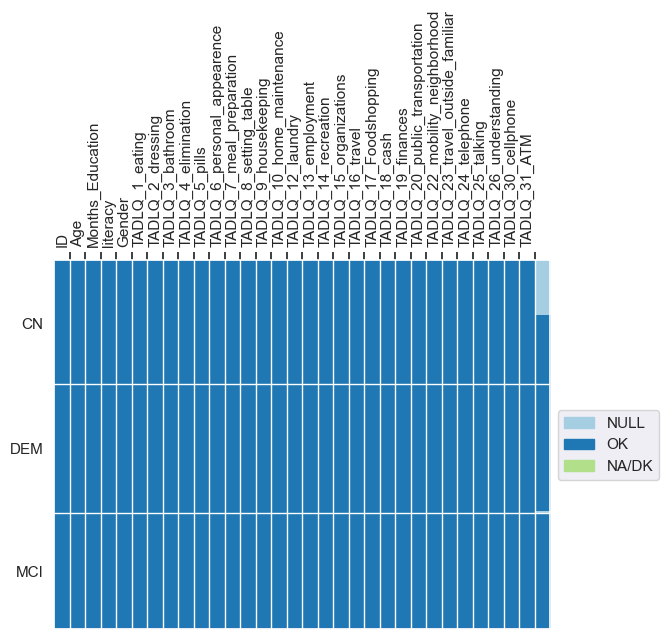

In [3]:
check_nulls(df_muestratotal, 'Diagnosis', figsize=None, aspect='auto', cmap=None)
check_nulls(df_solohombres, 'Diagnosis', figsize=None, aspect='auto', cmap=None)
check_nulls(df_solomujeres, 'Diagnosis', figsize=None, aspect='auto', cmap=None)

| #  | muestratotal                     | solohombres                       | solomujeres                      |
|----|----------------------------------|-----------------------------------|----------------------------------|
| 1  | TADLQ_1_eating                   | TADLQ_1_eating                    | TADLQ_1_eating                   |
| 2  | TADLQ_2_dressing                 | TADLQ_2_dressing                  | TADLQ_2_dressing                 |
| 3  | TADLQ_3_bathroom                 | TADLQ_3_bathroom                  | TADLQ_3_bathroom                 |
| 4  | TADLQ_4_elimination              | TADLQ_4_elimination               | TADLQ_4_elimination              |
| 5  | TADLQ_5_pills                    | TADLQ_5_pills                     | TADLQ_5_pills                    |
| 6  | TADLQ_6_personal_appearence      | TADLQ_6_personal_appearence       | TADLQ_6_personal_appearence      |
| 7  | TADLQ_7_meal_preparation         | -                                 | TADLQ_7_meal_preparation         |
| 8  | TADLQ_8_setting_table            | TADLQ_8_setting_table             | TADLQ_8_setting_table            |
| 9  | TADLQ_9_housekeeping             | TADLQ_9_housekeeping              | TADLQ_9_housekeeping             |
| 10 | TADLQ_10_home_maintenance        | TADLQ_10_home_maintenance         | TADLQ_10_home_maintenance        |
| 11 | TADLQ_11_home_repairs            | TADLQ_11_home_repairs             | -                                |
| 12 | TADLQ_12_laundry                 | -                                 | TADLQ_12_laundry                 |
| 13 | TADLQ_13_employment              | TADLQ_13_employment               | TADLQ_13_employment              |
| 14 | TADLQ_14_recreation              | TADLQ_14_recreation               | TADLQ_14_recreation              |
| 15 | TADLQ_15_organizations           | TADLQ_15_organizations            | TADLQ_15_organizations           |
| 16 | TADLQ_16_travel                  | TADLQ_16_travel                   | TADLQ_16_travel                  |
| 17 | TADLQ_17_Foodshopping            | TADLQ_17_Foodshopping             | TADLQ_17_Foodshopping            |
| 18 | TADLQ_18_cash                    | TADLQ_18_cash                     | TADLQ_18_cash                    |
| 19 | TADLQ_19_finances                | TADLQ_19_finances                 | TADLQ_19_finances                |
| 20 | TADLQ_20_public_transportation   | TADLQ_20_public_transportation    | TADLQ_20_public_transportation   |
| 21 | -                                | TADLQ_21_driving                  | -                                |
| 22 | TADLQ_22_mobility_neighborhood   | TADLQ_22_mobility_neighborhood    | TADLQ_22_mobility_neighborhood   |
| 23 | TADLQ_23_travel_outside_familiar | TADLQ_23_travel_outside_familiar  | TADLQ_23_travel_outside_familiar |
| 24 | TADLQ_24_telephone               | TADLQ_24_telephone                | TADLQ_24_telephone               |
| 25 | TADLQ_25_talking                 | TADLQ_25_talking                  | TADLQ_25_talking                 |
| 26 | TADLQ_26_understanding           | TADLQ_26_understanding            | TADLQ_26_understanding           |
| 27 | -                                | TADLQ_27_reading                  | -                                |
| 28 | -                                | -                                 | -                                |
| 29 | -                                | -                                 | -                                |
| 30 | TADLQ_30_cellphone               | TADLQ_30_cellphone                | TADLQ_30_cellphone               |
| 31 | TADLQ_31_ATM                     | TADLQ_31_ATM                      | TADLQ_31_ATM                     |

In [4]:
def normalize(df, value_vars):
    df[df.isna()] = 9

    value_vars = [v for v in value_vars if v in df.columns]
    
    # Normalize
    df_mean = df[value_vars].mean()
    df_std = df[value_vars].std()
    df.loc[:, value_vars] = (df[value_vars] - df_mean) / df_std
    
    return df, df_mean, df_std

df_muestratotal_norm, df_muestratotal_mean, df_muestratotal_std = normalize(df_muestratotal, value_vars)
df_solohombres_norm, df_solohombres_mean, df_solohombres_std = normalize(df_solohombres, value_vars)
df_solomujeres_norm, df_solomujeres_mean, df_solomujeres_std = normalize(df_solomujeres, value_vars)

In [5]:
def run(df, df_mean, df_std, value_vars, test_size = 0.3, max_depth = 10, n_estimators = 100, n_splits = 7, label=None, show_all_max_acc_tree=False):
    if label is not None:
        print(label)
    value_vars = [v for v in value_vars if v in df.columns]
    
    X = df[value_vars].values
    y = np.squeeze(df['Diagnosis'])
    class_names = list(y.unique())
    class_map = {c:i for i,c in enumerate(class_names)}
    y = y.map(class_map)

    # Reserve a portion of the dataset to validate
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)
    
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features='sqrt', random_state=0)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    model = cross_validate(clf, X_train, y_train, cv=cv, scoring='balanced_accuracy', return_estimator=True, return_train_score=True, return_indices=True)

    # Get the overall feature importances from all classifiers
    feat_imp = {}
    for classifier in model['estimator']:
        for cname, cval in zip(value_vars, classifier.feature_importances_):
            feat_imp[cname] = feat_imp.get(cname, 0) + cval
    feat_imp = pd.Series(feat_imp)
    feat_imp = feat_imp / feat_imp.sum()
    feat_imp.sort_values(ascending=True, inplace=True)
    feat_imp.plot.barh(width=.9, title=label)
    plt.show()
    
    # From all the estimators, pick the ones with best accuracy on the validation set
    trees = list(chain(*[e.estimators_ for e in model['estimator']]))
    acc = []
    for est in trees:
        classes = {c:i for i,c in enumerate(est.classes_)}
        y_test_ = y_test.map(classes).to_numpy()
        
        y_pred = est.predict(X_test)
        acc.append(accuracy_score(y_test_, y_pred))
    acc = np.float32(acc)
    ax = sns.histplot(x=acc)
    ax.set(xlabel='Accuracy', ylabel='Count')
    plt.show()

    # tree = trees[np.argmax(acc)].tree_
    
    # Pick from the threes with max accuracy
    max_acc = np.max(acc)
    idxs = np.where(acc == max_acc)[0].astype(int)

    print("Max ACC", max_acc, "Number with Max ACC:", len(idxs))

    # the one with the least leaves
    tree_leaves = [trees[i].tree_.n_leaves for i in idxs]
    min_tree_leaves = np.min(tree_leaves)
    print('Min tree leaves', min_tree_leaves)
    idxs = [idxs[i] for i in np.where(tree_leaves == min_tree_leaves)[0]]

    print("Min Leaves", min_tree_leaves, "Number with Min Leaves:", len(idxs))
    # print(len(tree_leaves), idxs)

    scores = []
    for i in idxs:
        tree = trees[i].tree_
        scores.append(0)
        for s in tree.feature:
            if s > 0:
                scores[-1] += feat_imp.iloc[s]       
    
    max_score_idx = np.argmax(scores)
    max_score = scores[max_score_idx]
    tree = trees[idxs[max_score_idx]].tree_

    print("Max score", max_score)
    # print(scores)
    
    image = plot_decision_Tree(tree, value_vars, df_mean, df_std, class_names=class_names, label=f"{label}\nAcc: {max_acc}\nScore:{max_score:0.3f}")
    display(Image(image))

    if show_all_max_acc_tree:
        print("All trees with max accuracy")
        for i, s in zip(idxs, scores):
            tree = trees[i].tree_
            image = plot_decision_Tree(tree, value_vars, df_mean, df_std, class_names=class_names, label=f"{label}\nMax Acc: {max_acc}\nScore:{s:0.3f}")
            display(Image(image))

Total Sample


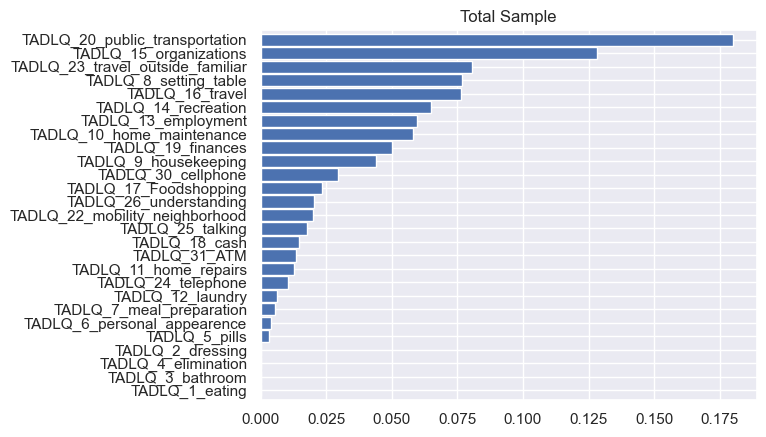

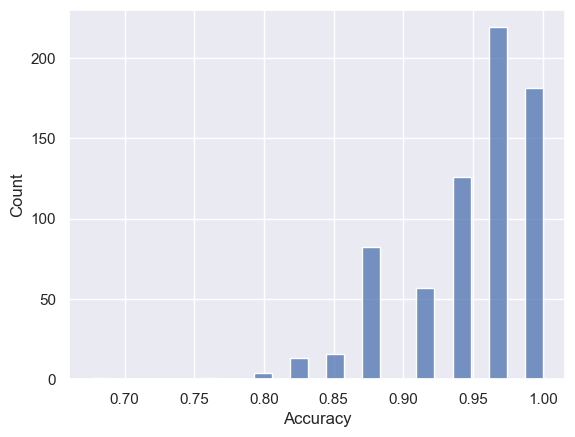

Max ACC 1.0 Number with Max ACC: 181
Min tree leaves 3
Min Leaves 3 Number with Min Leaves: 72
Max score 0.12301589040592475


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


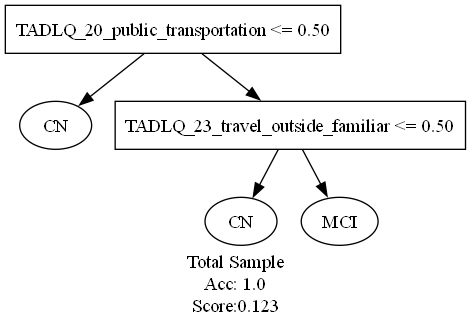

Male Only


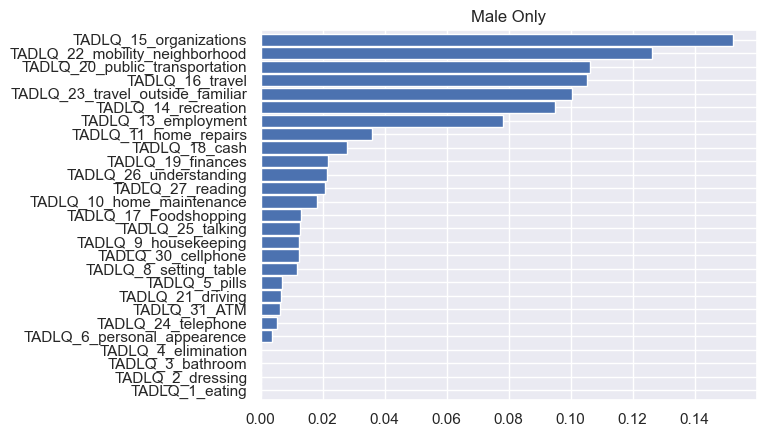

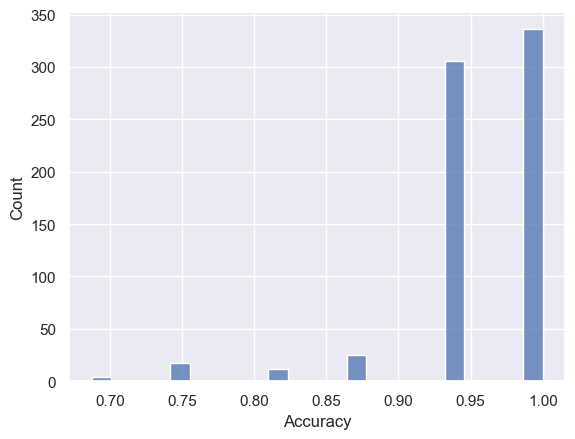

Max ACC 1.0 Number with Max ACC: 336
Min tree leaves 2
Min Leaves 2 Number with Min Leaves: 180
Max score 0.07806003060038887


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


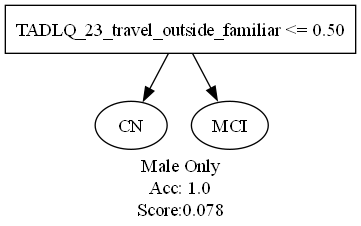

Female Only


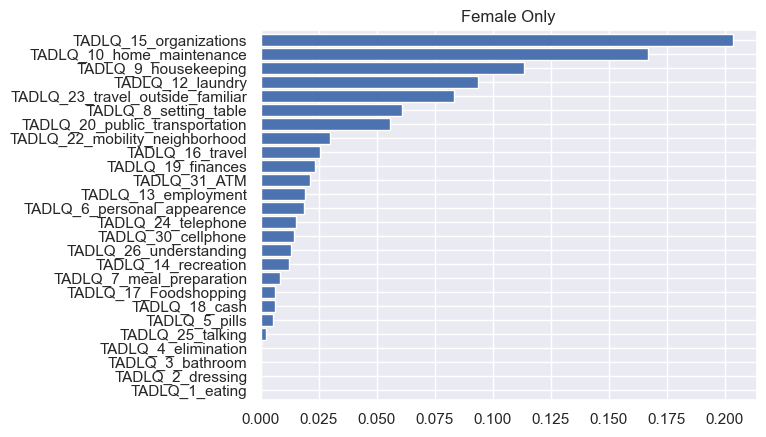

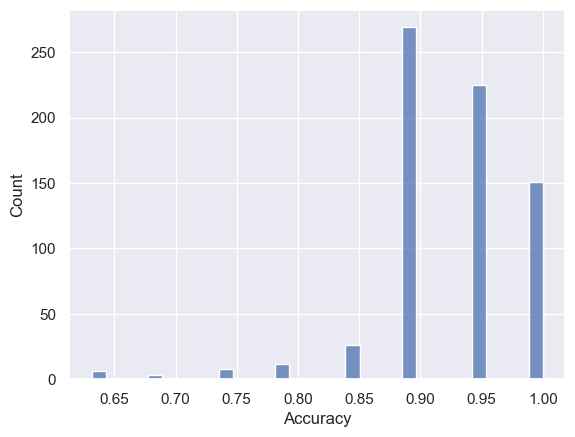

Max ACC 1.0 Number with Max ACC: 151
Min tree leaves 2
Min Leaves 2 Number with Min Leaves: 7
Max score 0.006368161415469415


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


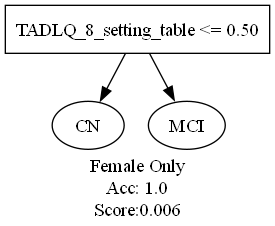

In [6]:
# CN vs MCI
mask_muestratotal = df_muestratotal_norm['Diagnosis'].isin(['CN', 'MCI'])
mask_solohombres = df_solohombres_norm['Diagnosis'].isin(['CN', 'MCI'])
mask_solomujeres = df_solomujeres_norm['Diagnosis'].isin(['CN', 'MCI'])

run(df_muestratotal_norm.loc[mask_muestratotal, :],
    df_muestratotal_mean,
    df_muestratotal_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Total Sample",
    show_all_max_acc_tree=False)

run(df_solohombres_norm.loc[mask_solohombres, :],
    df_solohombres_mean,
    df_solohombres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Male Only",
    show_all_max_acc_tree=False)

run(df_solomujeres_norm.loc[mask_solomujeres, :],
    df_solomujeres_mean,
    df_solomujeres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Female Only",
    show_all_max_acc_tree=False)

Total Sample


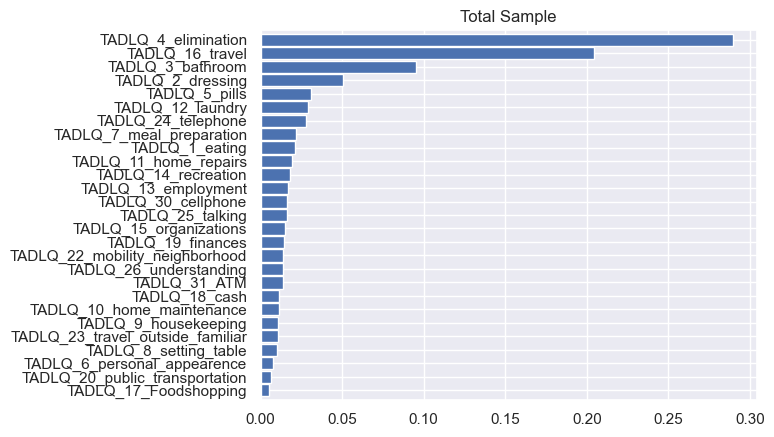

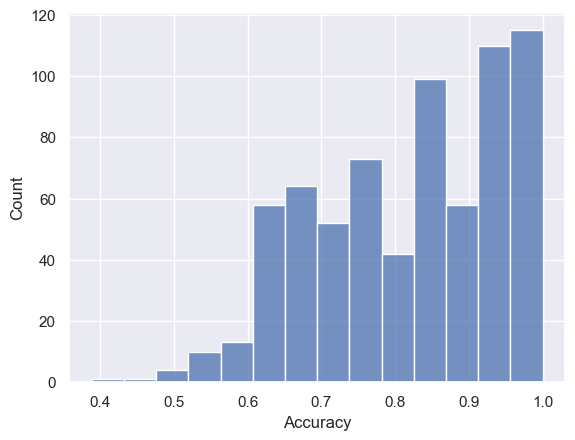

Max ACC 1.0 Number with Max ACC: 30
Min tree leaves 4
Min Leaves 4 Number with Min Leaves: 1
Max score 0.033322335631141474


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


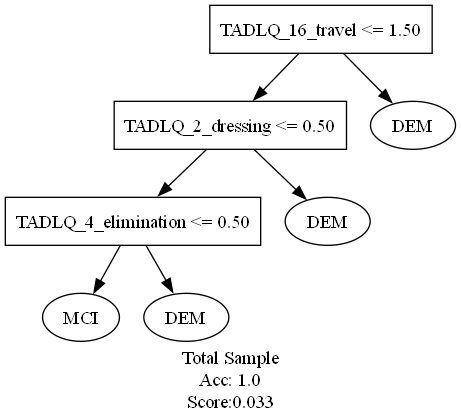

Male Only


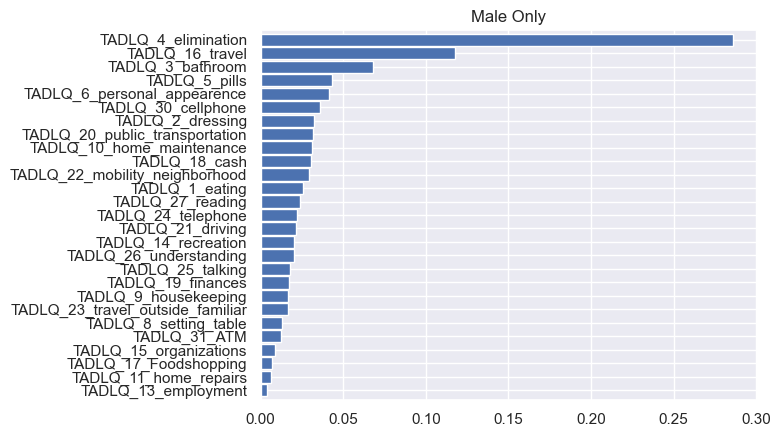

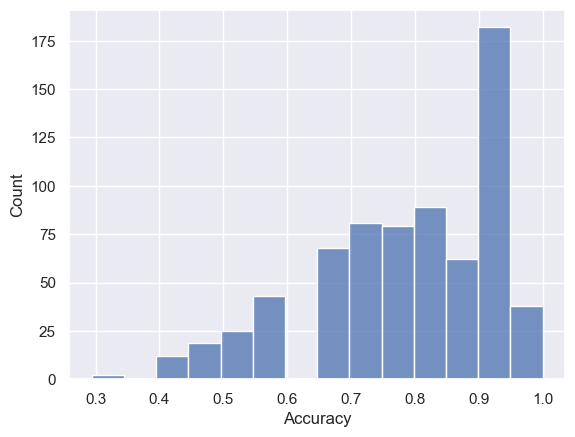

Max ACC 1.0 Number with Max ACC: 38
Min tree leaves 3
Min Leaves 3 Number with Min Leaves: 8
Max score 0.01573769646897958


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


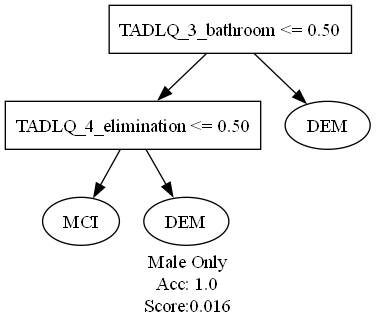

Female Only


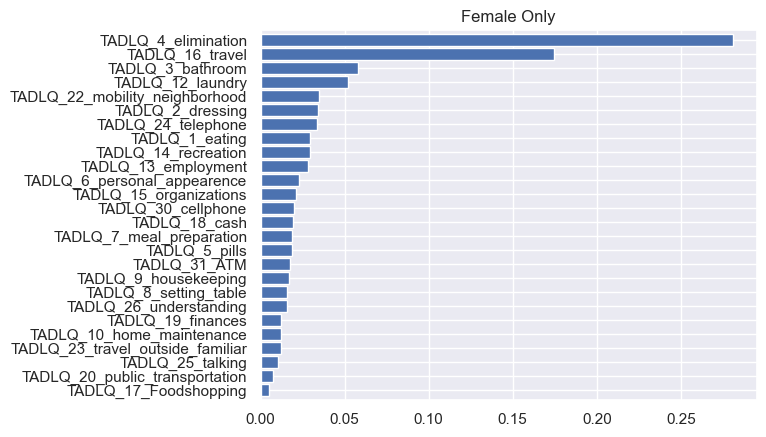

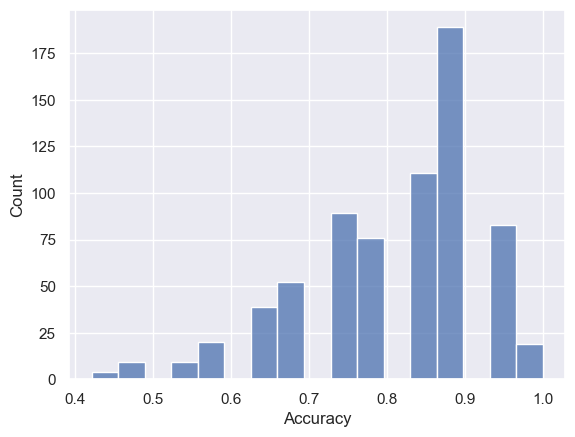

Max ACC 1.0 Number with Max ACC: 19
Min tree leaves 5
Min Leaves 5 Number with Min Leaves: 5
Max score 0.07099882599462132


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


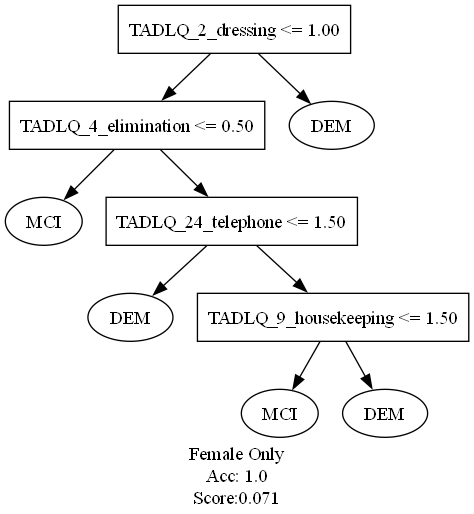

In [7]:
# MCI vs DEM
mask_muestratotal = df_muestratotal_norm['Diagnosis'].isin(['MCI', 'DEM'])
mask_solohombres = df_solohombres_norm['Diagnosis'].isin(['MCI', 'DEM'])
mask_solomujeres = df_solomujeres_norm['Diagnosis'].isin(['MCI', 'DEM'])

run(df_muestratotal_norm.loc[mask_muestratotal, :],
    df_muestratotal_mean,
    df_muestratotal_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Total Sample",
    show_all_max_acc_tree=False)

run(df_solohombres_norm.loc[mask_solohombres, :],
    df_solohombres_mean,
    df_solohombres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Male Only",
    show_all_max_acc_tree=False)

run(df_solomujeres_norm.loc[mask_solomujeres, :],
    df_solomujeres_mean,
    df_solomujeres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Female Only",
    show_all_max_acc_tree=False)

Total Sample


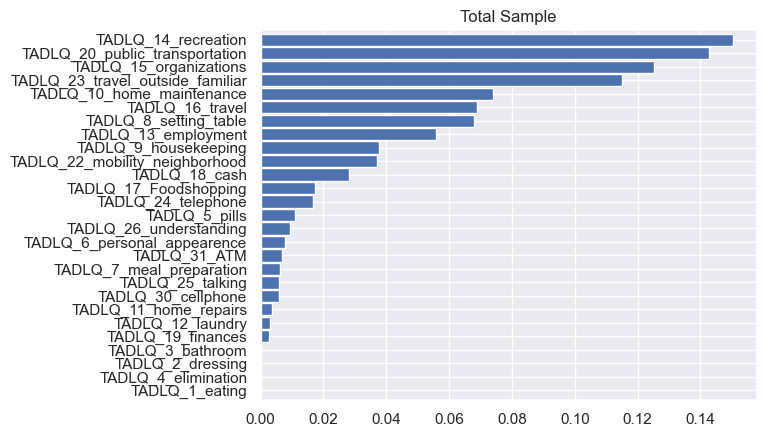

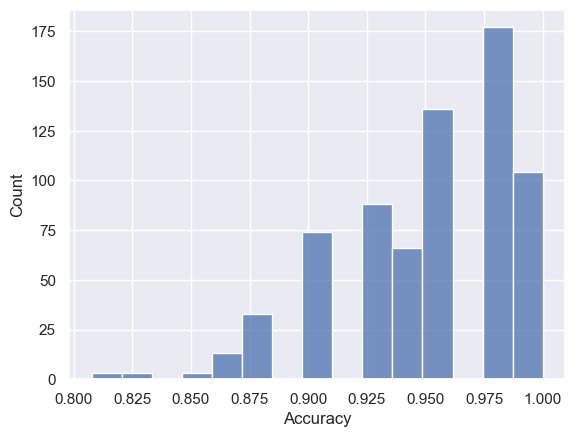

Max ACC 1.0 Number with Max ACC: 104
Min tree leaves 3
Min Leaves 3 Number with Min Leaves: 41
Max score 0.07268646775450509


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


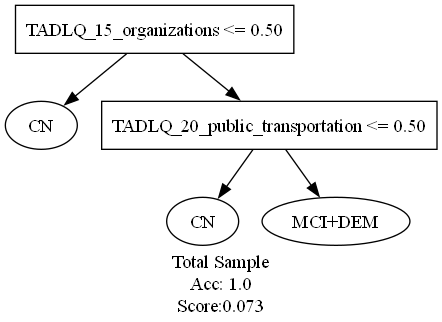

Male Only


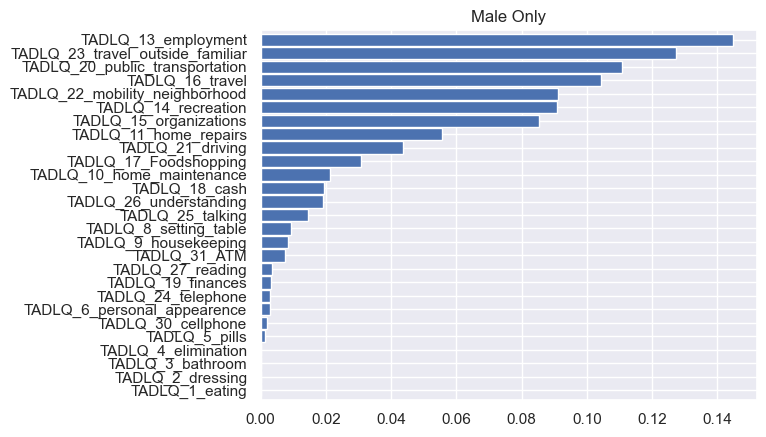

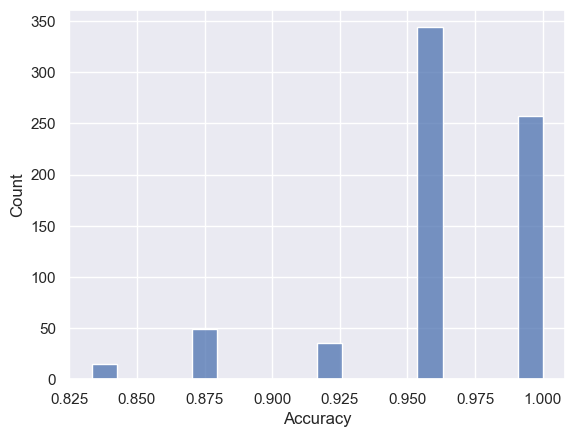

Max ACC 1.0 Number with Max ACC: 257
Min tree leaves 2
Min Leaves 2 Number with Min Leaves: 118
Max score 0.055669218926158906


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


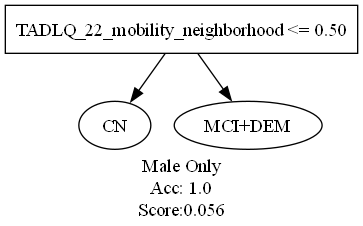

Female Only


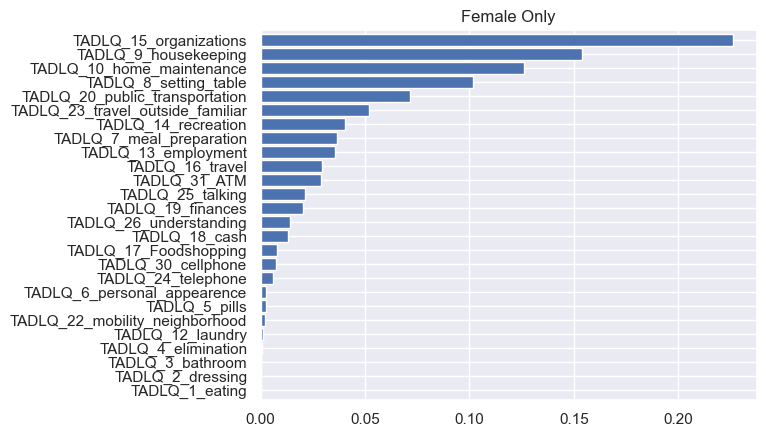

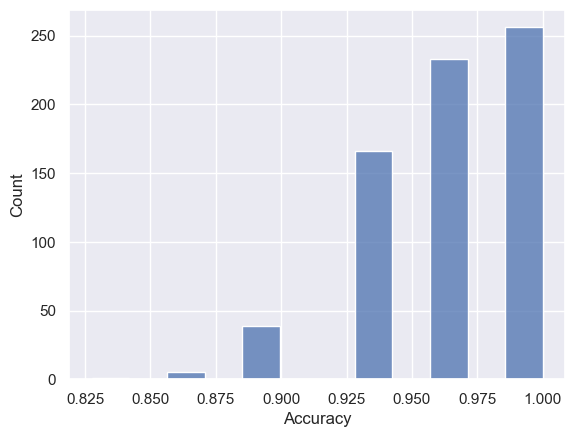

Max ACC 1.0 Number with Max ACC: 256
Min tree leaves 2
Min Leaves 2 Number with Min Leaves: 16
Max score 0.005827652482430777


C:\Users\seba-\OneDrive\Trabajo\FONDECYT Demencia\utils.py:319: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thresholds = [(t * threshold_std[i]) + threshold_mean[i] for i, t in zip(tree.feature, tree.threshold)]


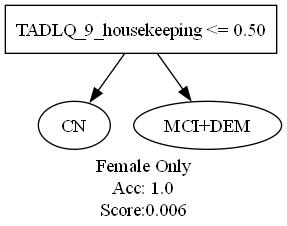

In [8]:
# CTR vs MCI+DEM
mask_muestratotal = df_muestratotal_norm['Diagnosis'].isin(['MCI', 'DEM'])
mask_solohombres = df_solohombres_norm['Diagnosis'].isin(['MCI', 'DEM'])
mask_solomujeres = df_solomujeres_norm['Diagnosis'].isin(['MCI', 'DEM'])

df_muestratotal_norm_mciodem = df_muestratotal_norm.copy()
df_solohombres_norm_mciodem = df_solohombres_norm.copy()
df_solomujeres_norm_mciodem = df_solomujeres_norm.copy()

df_muestratotal_norm_mciodem['Diagnosis'] = df_muestratotal_norm_mciodem['Diagnosis'].cat.add_categories('MCI+DEM')
df_solohombres_norm_mciodem['Diagnosis'] = df_solohombres_norm_mciodem['Diagnosis'].cat.add_categories('MCI+DEM')
df_solomujeres_norm_mciodem['Diagnosis'] = df_solomujeres_norm_mciodem['Diagnosis'].cat.add_categories('MCI+DEM')

df_muestratotal_norm_mciodem.loc[mask_muestratotal, 'Diagnosis'] = 'MCI+DEM'
df_solohombres_norm_mciodem.loc[mask_solohombres, 'Diagnosis'] = 'MCI+DEM'
df_solomujeres_norm_mciodem.loc[mask_solomujeres, 'Diagnosis'] = 'MCI+DEM'

run(df_muestratotal_norm_mciodem,
    df_muestratotal_mean,
    df_muestratotal_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Total Sample",
    show_all_max_acc_tree=False)

run(df_solohombres_norm_mciodem,
    df_solohombres_mean,
    df_solohombres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Male Only",
    show_all_max_acc_tree=False)

run(df_solomujeres_norm_mciodem,
    df_solomujeres_mean,
    df_solomujeres_std,
    value_vars,
    test_size=0.3,
    max_depth=10,
    n_estimators=100,
    n_splits=7,
    label="Female Only",
    show_all_max_acc_tree=False)